<a href="https://colab.research.google.com/github/GMAC1231/Abdullah/blob/main/Abdullah%20Muhammad%2022f23591%20AI_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [10]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/face_classification/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/face_classification/test'    # Update with your actual path

In [11]:
import os
print(len(os.listdir('/content/drive/MyDrive/face_classification/test/happy_person_face')))
print(len(os.listdir('/content/drive/MyDrive/face_classification/train/sad_person_face')))
print(len(os.listdir('/content/drive/MyDrive/face_classification/test/happy_person_face')))
print(len(os.listdir('/content/drive/MyDrive/face_classification/test/sad_person_face')))

92
73
92
73


In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (happy face vs. sad face)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 132 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [13]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [14]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [16]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 51s 10s/step - accuracy: 0.5909 - loss: 1.2390 - val_accuracy: 0.5625 - val_loss: 0.6626
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.5744 - loss: 0.6615 - val_accuracy: 0.5625 - val_loss: 0.6603
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.6272 - loss: 0.6269 - val_accuracy: 0.7188 - val_loss: 0.6080
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 6s/step - accuracy: 0.7430 - loss: 0.5127 - val_accuracy: 0.5625 - val_loss: 0.8968
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.6916 - loss: 0.5252 - val_accuracy: 0.7188 - val_loss: 0.5674
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 44s 6s/step - accuracy: 0.8174 - loss: 0.4672 - val_accuracy: 0.6562 - val_loss: 0.5420
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step - accuracy: 0.7786 - loss: 0.4302 - val_accuracy: 0.5625 - val_loss: 0.7073
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.8328 - loss: 0.3787 - val_accuracy: 0.5938 - val_loss: 0.5357
Epoch 9

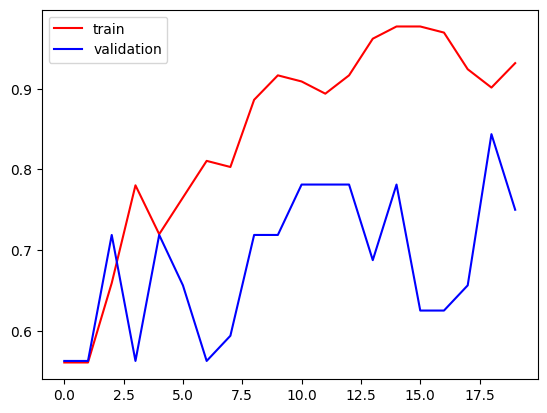

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

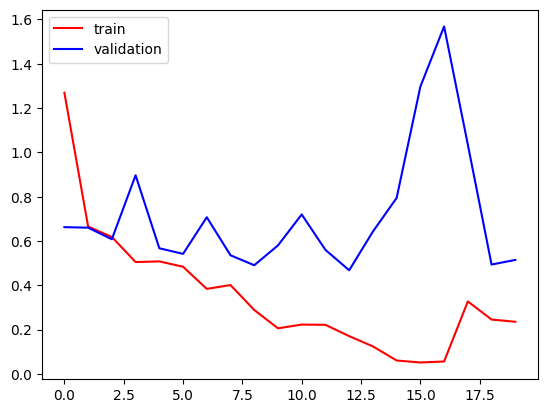

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 164 images belonging to 2 classes.


In [22]:
#predict the test data
predictions = model.predict(test_data)


6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step


In [24]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[48 43]
 [43 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        91
           1       0.41      0.41      0.41        73

    accuracy                           0.48       164
   macro avg       0.47      0.47      0.47       164
weighted avg       0.48      0.48      0.48       164



In [25]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 43s 7s/step - accuracy: 0.5229 - loss: 13.1983 - val_accuracy: 0.5625 - val_loss: 2.6824
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.7313 - loss: 5.9772 - val_accuracy: 0.5938 - val_loss: 1.2527
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 35s 8s/step - accuracy: 0.7941 - loss: 4.8286 - val_accuracy: 0.6250 - val_loss: 3.2189
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 7s/step - accuracy: 0.7826 - loss: 3.8479 - val_accuracy: 0.5312 - val_loss: 2.8246
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 7s/step - accuracy: 0.8153 - loss: 3.1462 - val_accuracy: 0.6250 - val_loss: 4.6218
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.8853 - loss: 1.7759 - val_accuracy: 0.5625 - val_loss: 4.7725
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 53s 12s/step - accuracy: 0.7538 - loss: 3.6539 - val_accuracy: 0.7188 - val_loss: 1.6428
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 35s 7s/step - accuracy: 0.9157 - loss: 2.1559 - val_accuracy: 0.7188 - val_loss: 2.3518
Epoch 

In [28]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 164 images belonging to 2 classes.


In [29]:
predictions = model.predict(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[55 36]
 [40 33]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59        91
           1       0.48      0.45      0.46        73

    accuracy                           0.54       164
   macro avg       0.53      0.53      0.53       164
weighted avg       0.53      0.54      0.54       164



In [35]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

In [37]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 61s 10s/step - accuracy: 0.5124 - loss: 2.9348 - val_accuracy: 0.5625 - val_loss: 5.8642
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 76s 11s/step - accuracy: 0.4866 - loss: 3.7915 - val_accuracy: 0.4375 - val_loss: 3.7983
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 44s 9s/step - accuracy: 0.6315 - loss: 1.5204 - val_accuracy: 0.5625 - val_loss: 1.5158
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 45s 9s/step - accuracy: 0.5475 - loss: 1.2027 - val_accuracy: 0.4375 - val_loss: 1.4808
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 45s 9s/step - accuracy: 0.5929 - loss: 0.8635 - val_accuracy: 0.6562 - val_loss: 0.9534
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 44s 9s/step - accuracy: 0.6530 - loss: 0.7023 - val_accuracy: 0.4062 - val_loss: 1.1816
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 83s 9s/step - accuracy: 0.6742 - loss: 0.7937 - val_accuracy: 0.5625 - val_loss: 1.0933
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 44s 11s/step - accuracy: 0.6303 - loss: 0.6292 - val_accuracy: 0.5000 - val_loss: 0.8435
Epoch

In [39]:
predictions = resnet_model.predict(test_data)

6/6 ━━━━━━━━━━━━━━━━━━━━ 49s 8s/step


In [43]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[52 39]
 [44 29]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.54      0.57      0.56        91
           1       0.43      0.40      0.41        73

    accuracy                           0.49       164
   macro avg       0.48      0.48      0.48       164
weighted avg       0.49      0.49      0.49       164

